In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

Number of instances: 18846
Number of classes: 20

Classes in dataset:
0: alt.atheism (799 posts)
1: comp.graphics (973 posts)
2: comp.os.ms-windows.misc (985 posts)
3: comp.sys.ibm.pc.hardware (982 posts)
4: comp.sys.mac.hardware (963 posts)
5: comp.windows.x (988 posts)
6: misc.forsale (975 posts)
7: rec.autos (990 posts)
8: rec.motorcycles (996 posts)
9: rec.sport.baseball (994 posts)
10: rec.sport.hockey (999 posts)
11: sci.crypt (991 posts)
12: sci.electronics (984 posts)
13: sci.med (990 posts)
14: sci.space (987 posts)
15: soc.religion.christian (997 posts)
16: talk.politics.guns (910 posts)
17: talk.politics.mideast (940 posts)
18: talk.politics.misc (775 posts)
19: talk.religion.misc (628 posts)


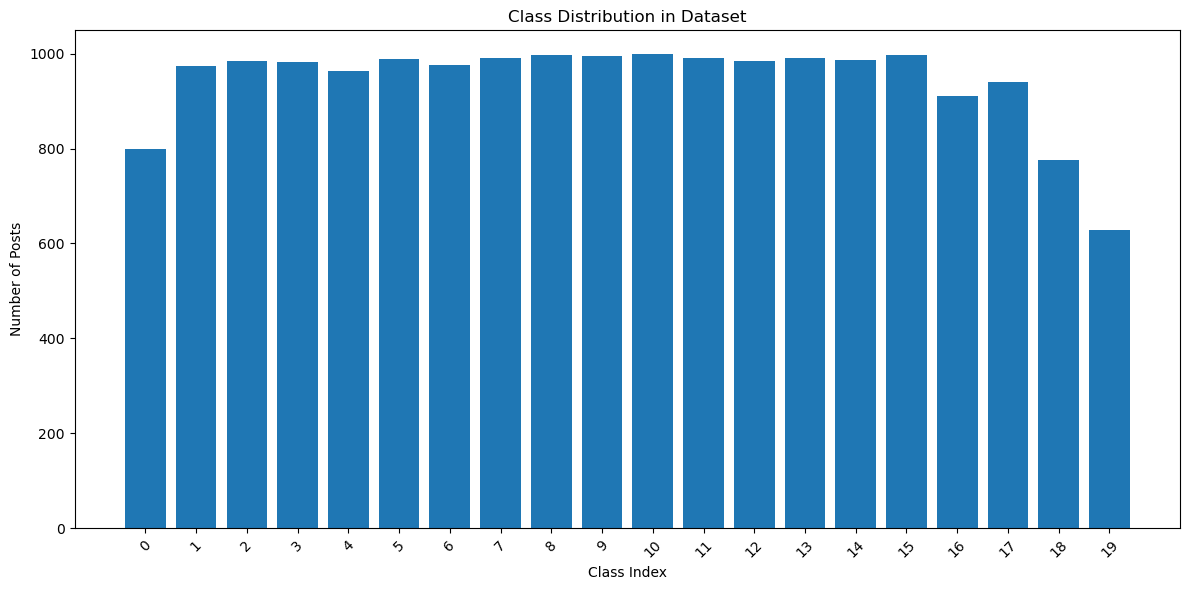


Sample post (first 300 characters):
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent

Issues that cause overfitting:
- Email headers (From:, Subject:, Date:)
- Quoted text from previous messages
- Email signatures and footers

Loading cleaned dataset without headers, footers, quotes...
Cleaned dataset loaded.


In [ ]:
#loading the dataset
newsgroups = fetch_20newsgroups(subset='all')
X = newsgroups.data
y = newsgroups.target
target_names = newsgroups.target_names

# 1(a): How many instances and variables?
print(f"Number of instances: {len(X)}")
print(f"Number of classes: {len(target_names)}")

# 1(b): Which classes and their counts?
print("\nClasses in dataset:")
for i, name in enumerate(target_names):
    count = sum(y == i)
    print(f"{i}: {name} ({count} posts)")

# 1(c): Plot class distribution
class_counts = [sum(y == i) for i in range(len(target_names))]

plt.figure(figsize=(12, 6))
plt.bar(range(len(target_names)), class_counts)
plt.title('Class Distribution in Dataset')
plt.xlabel('Class Index')
plt.ylabel('Number of Posts')
plt.xticks(range(len(target_names)), rotation=45)
plt.tight_layout()
plt.show()

# 1(d): Look for overfitting issues and fix them
print("\nSample post (first 300 characters):")
print(X[0][:300])

print("\nIssues that cause overfitting:")
print("- Email headers (From:, Subject:, Date:)")
print("- Quoted text from previous messages") 
print("- Email signatures and footers")

print("\nLoading cleaned dataset without headers, footers, quotes...")
newsgroups_clean = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
X = newsgroups_clean.data
y = newsgroups_clean.target

print("Cleaned dataset loaded.")


Training set size: 15076
Test set size: 3770


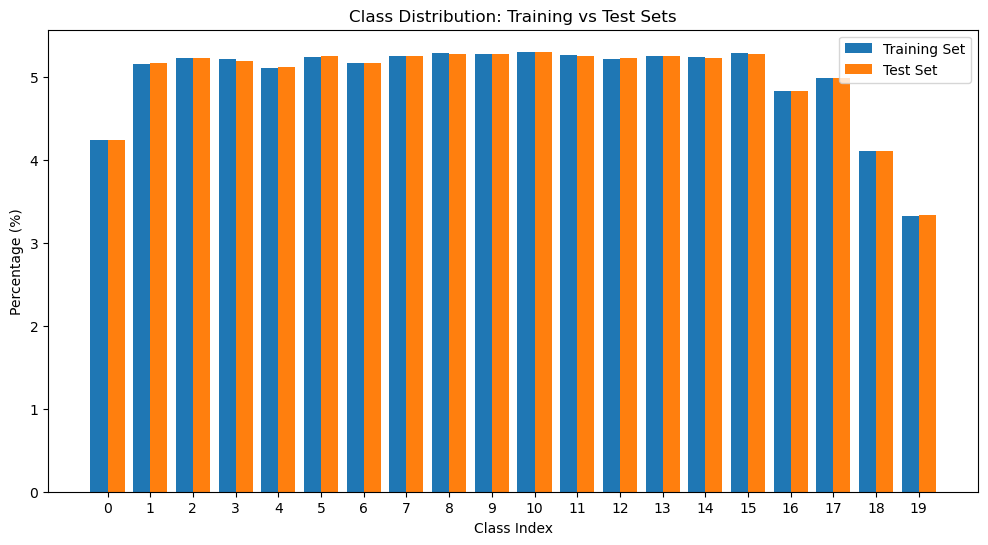

In [4]:
# 2(a): Split data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# 2(b): Check equal distribution
train_dist = [sum(y_train == i) / len(y_train) * 100 for i in range(len(target_names))]
test_dist = [sum(y_test == i) / len(y_test) * 100 for i in range(len(target_names))]

plt.figure(figsize=(12, 6))
x_pos = np.arange(len(target_names))
plt.bar(x_pos - 0.2, train_dist, 0.4, label='Training Set')
plt.bar(x_pos + 0.2, test_dist, 0.4, label='Test Set')
plt.xlabel('Class Index')
plt.ylabel('Percentage (%)')
plt.title('Class Distribution: Training vs Test Sets')
plt.legend()
plt.xticks(x_pos)
plt.show()

In [5]:
# 3(a): Basic CountVectorizer
vectorizer_basic = CountVectorizer()
X_train_basic = vectorizer_basic.fit_transform(X_train)

print(f"\n3(a) Number of features with basic CountVectorizer: {X_train_basic.shape[1]}")
print("Is this a good number? No - too many features will cause overfitting and poor KNN performance")

# 3(b): Improved CountVectorizer with filtering
vectorizer = CountVectorizer(max_df=0.5, min_df=0.001)
X_train_features = vectorizer.fit_transform(X_train)

print(f"\n3(b) Number of features after filtering: {X_train_features.shape[1]}")

# 3(c): Apply TfidfTransformer
tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_train_features)
X_test_tfidf = tfidf.transform(vectorizer.transform(X_test))

print("3(c) TfidfTransformer applied successfully")


3(a) Number of features with basic CountVectorizer: 123548
Is this a good number? No - too many features will cause overfitting and poor KNN performance

3(b) Number of features after filtering: 9123
3(c) TfidfTransformer applied successfully
